<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here

diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
y_df = pd.DataFrame(diabetes.target)

In [5]:
y_df.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


### Prepare input data

In [6]:
# insert code here
X = diabetes.data
n_cols = X.shape[1]

y = diabetes.target

### Split the data (training/test)

In [7]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [8]:
# insert code here
model = Sequential()

In [9]:
# insert code here
# # Add the first hidden layer
model.add(Dense(30, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(15, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [11]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


### Fit the training data

In [12]:
%%time
# insert code here

fitted_model = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 1000,
    verbose = 0)

CPU times: user 1min, sys: 7.41 s, total: 1min 7s
Wall time: 58.1 s


### Create predictions

In [13]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [14]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss:%.6f' % score[0])

5/5 [==============================] - 0s 1ms/step - loss: 3364.1077 - mape: 43.6023

Test loss:3364.107666


In [15]:
score

[3364.107666015625, 43.602291107177734]

### Visualisation of cost

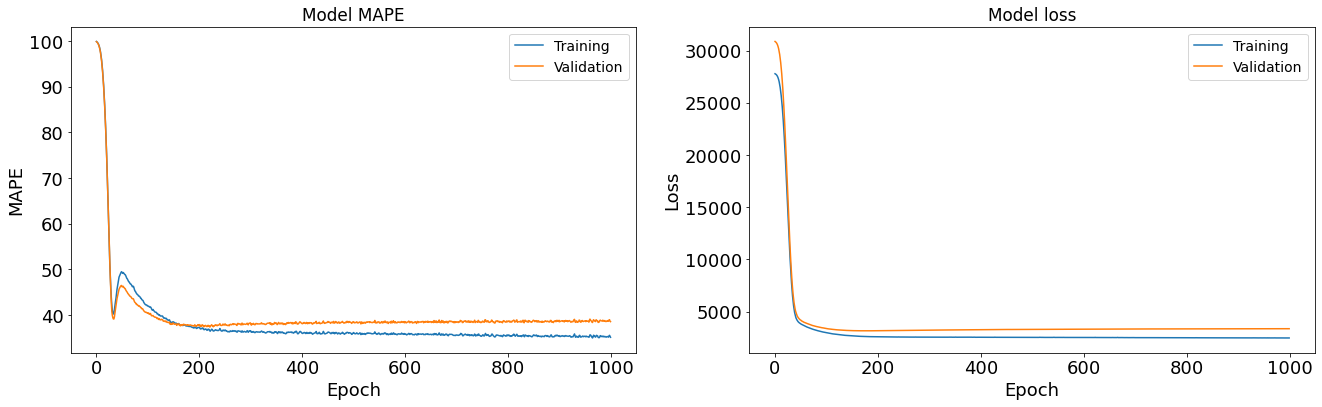

In [17]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['mape'], label = 'Training')
ax[0].plot(fitted_model.history['val_mape'], label = 'Validation')
ax[0].set_title('Model MAPE')
ax[0].set_ylabel('MAPE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'], label = 'Training')
ax[1].plot(fitted_model.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

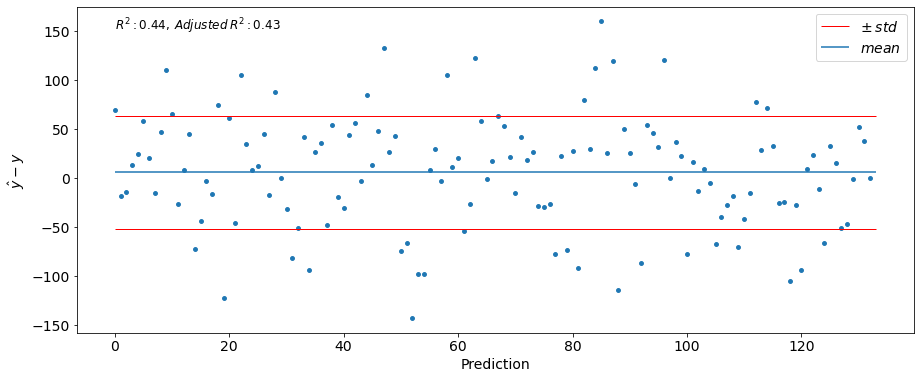

In [18]:
# insert code here
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



© 2020 Institute of Data